In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [74]:
df = pd.read_csv(
    r"D:\python project\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",
    encoding="unicode_escape"
)

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [78]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [79]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [80]:
df.dropna(inplace=True)

In [81]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [82]:
df['Amount'] = df['Amount'].astype('int')

In [83]:
df['Amount'].dtypes

dtype('int64')

In [84]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [85]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [86]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


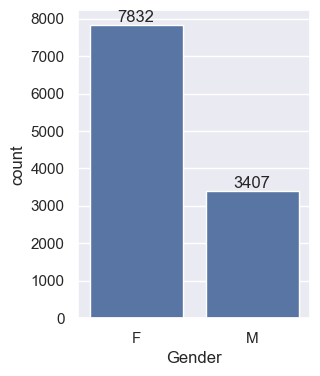

In [107]:
ax =sns.countplot(x = 'Gender',data =df)
sns.set({'figure.figsize' :(3,2)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

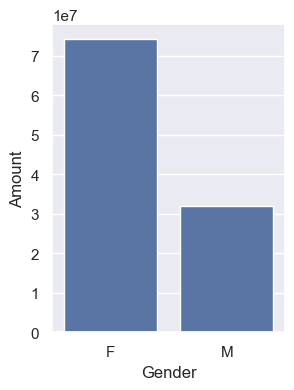

In [106]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values (by='Amount', ascending = False)
sns.set({'figure.figsize' :(3,4)})
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)



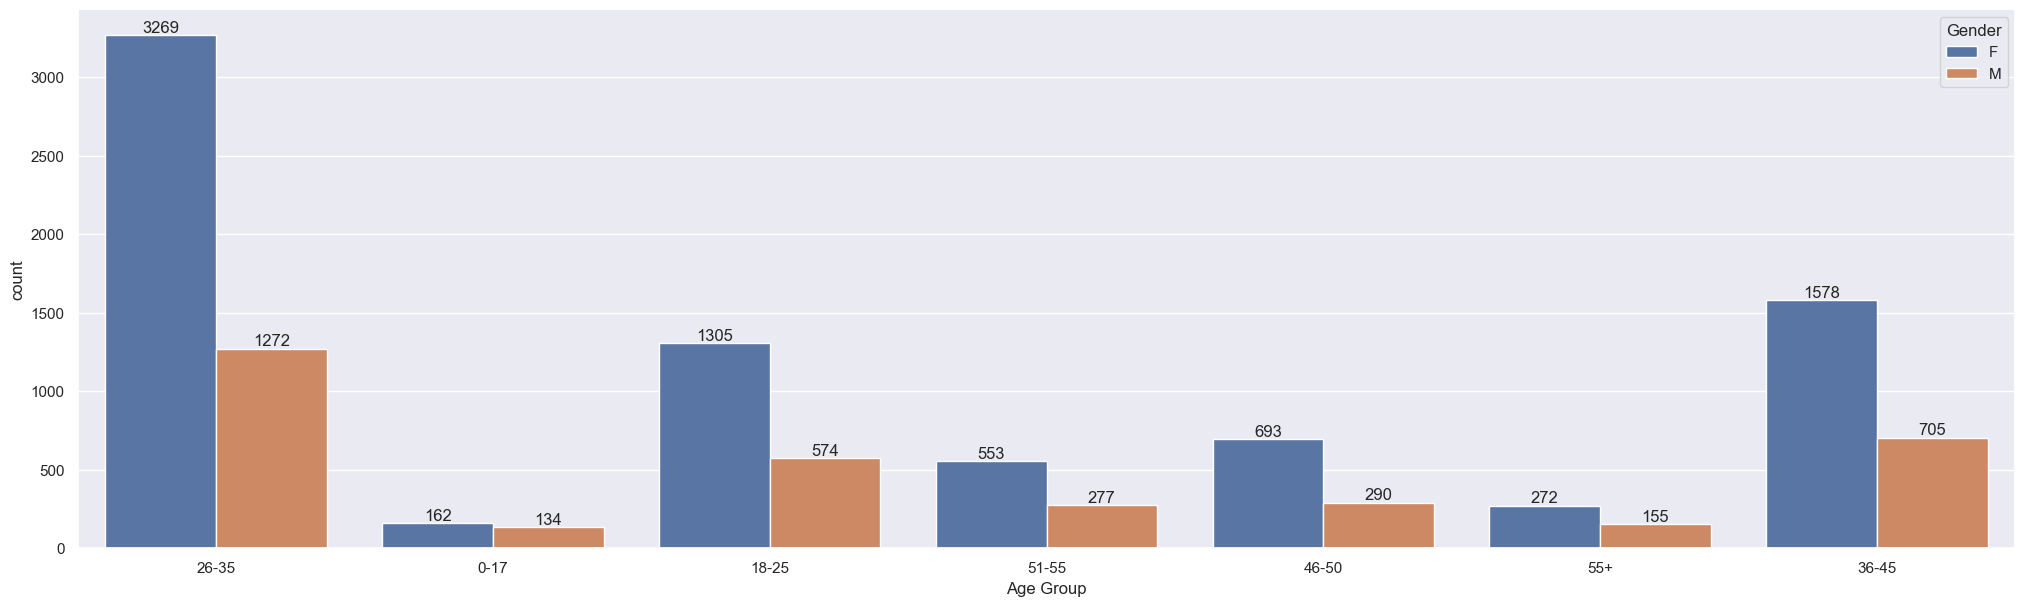

In [89]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

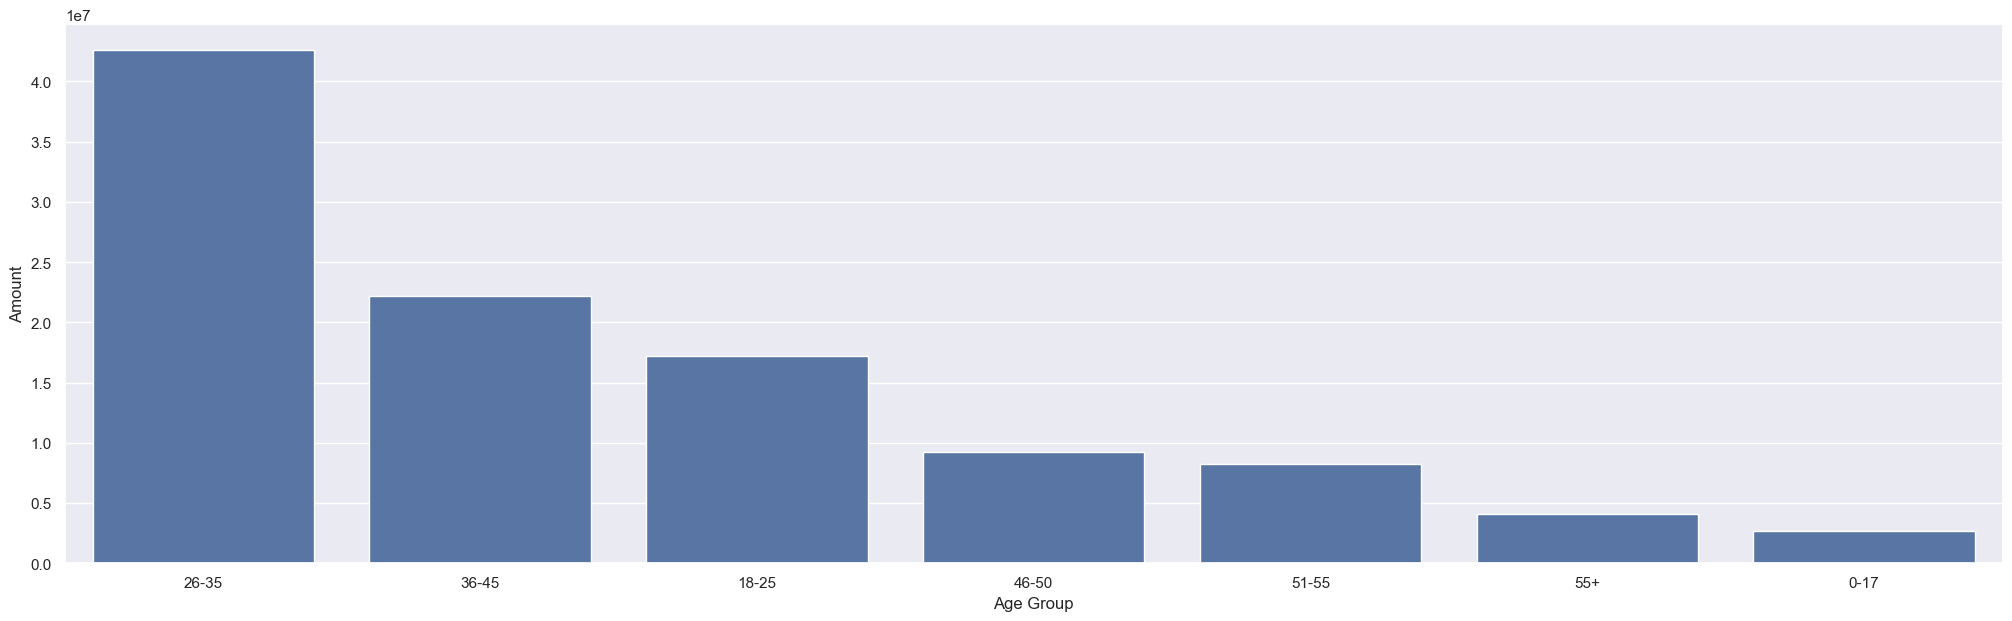

In [90]:
salse_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values (by='Amount', ascending = False)
sns.barplot(data = salse_age, x = 'Age Group', y = 'Amount')

<Axes: xlabel='State', ylabel='Amount'>

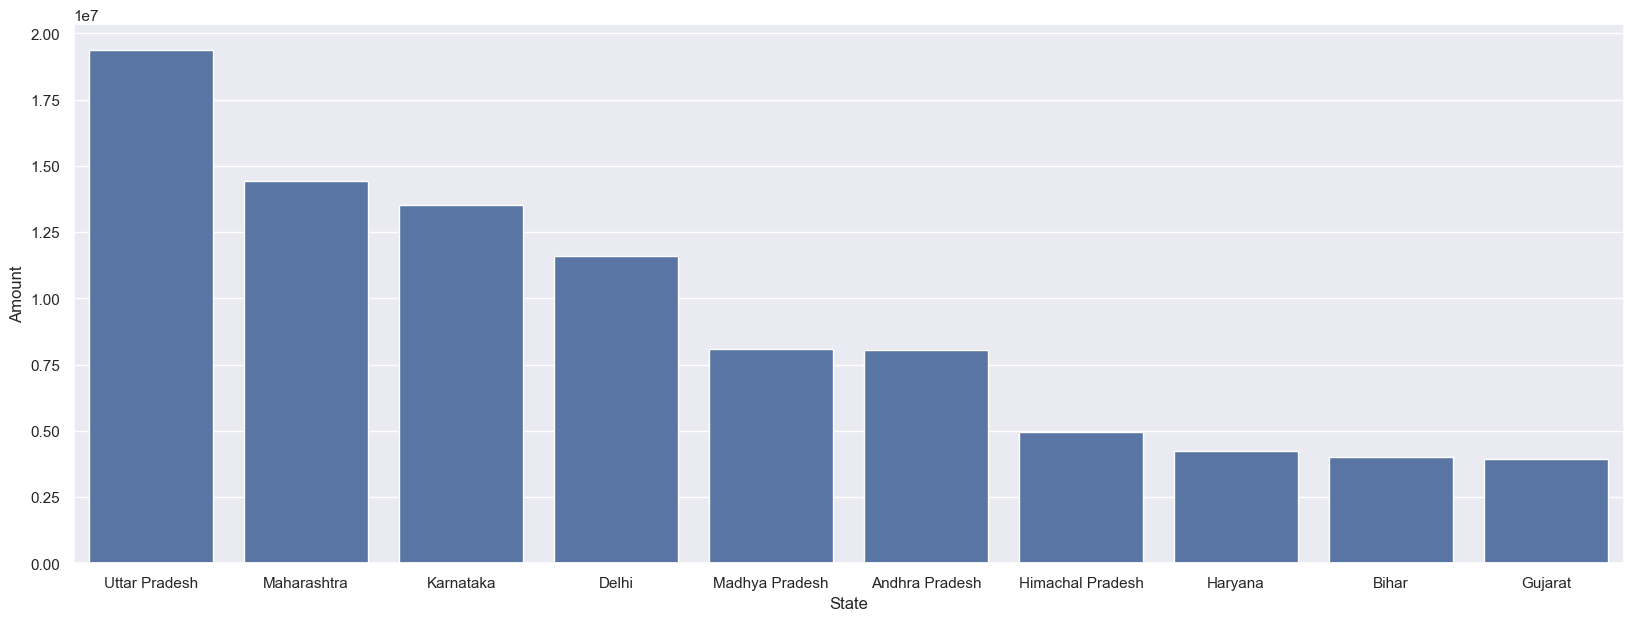

In [112]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values (by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize' :(20,7)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

<Axes: xlabel='State', ylabel='Orders'>

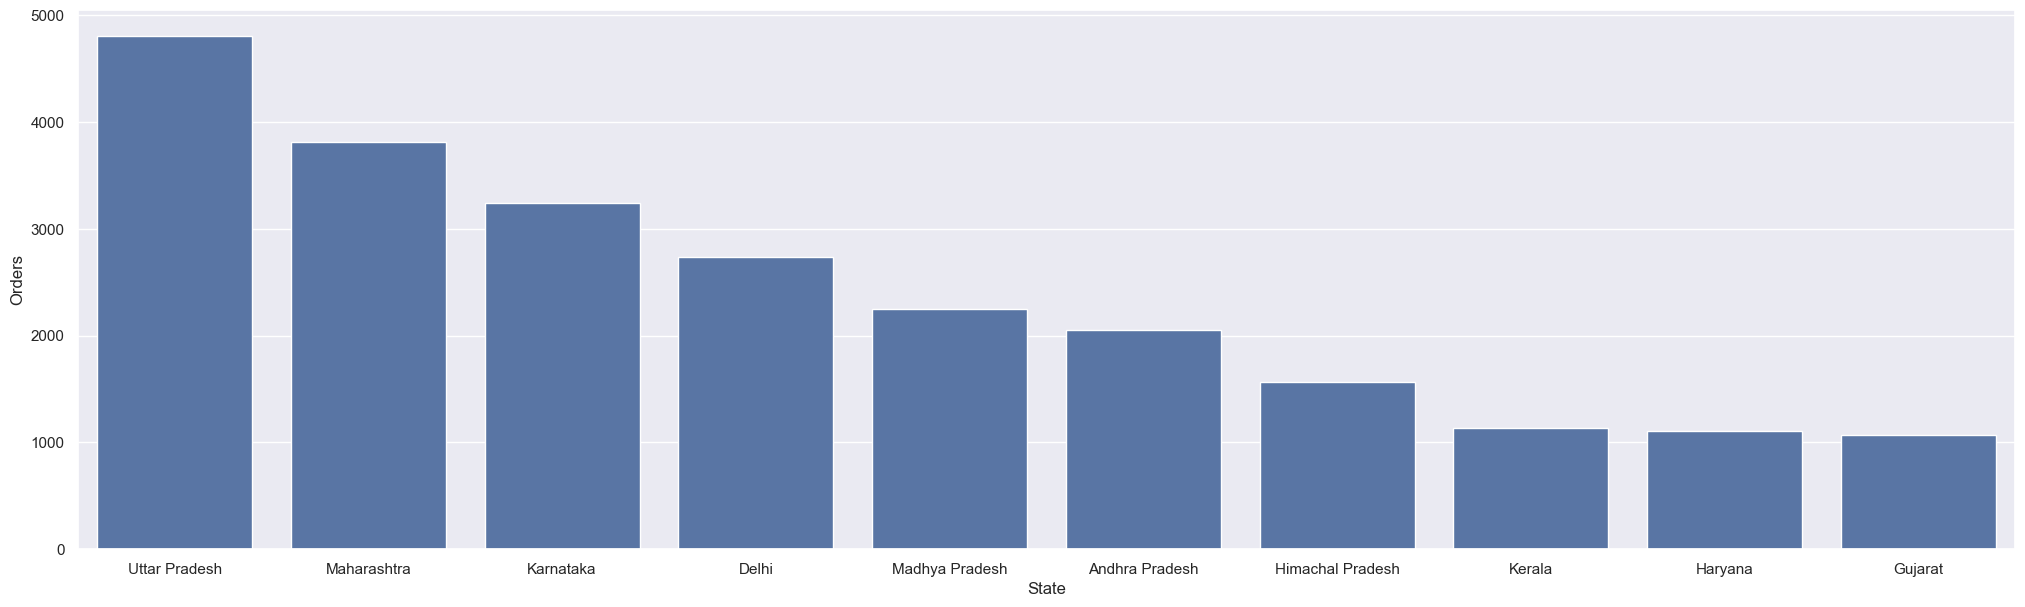

In [92]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values (by='Orders', ascending = False).head(10)
                                                                                                                       
sns.set(rc={'figure.figsize' :(25,7)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

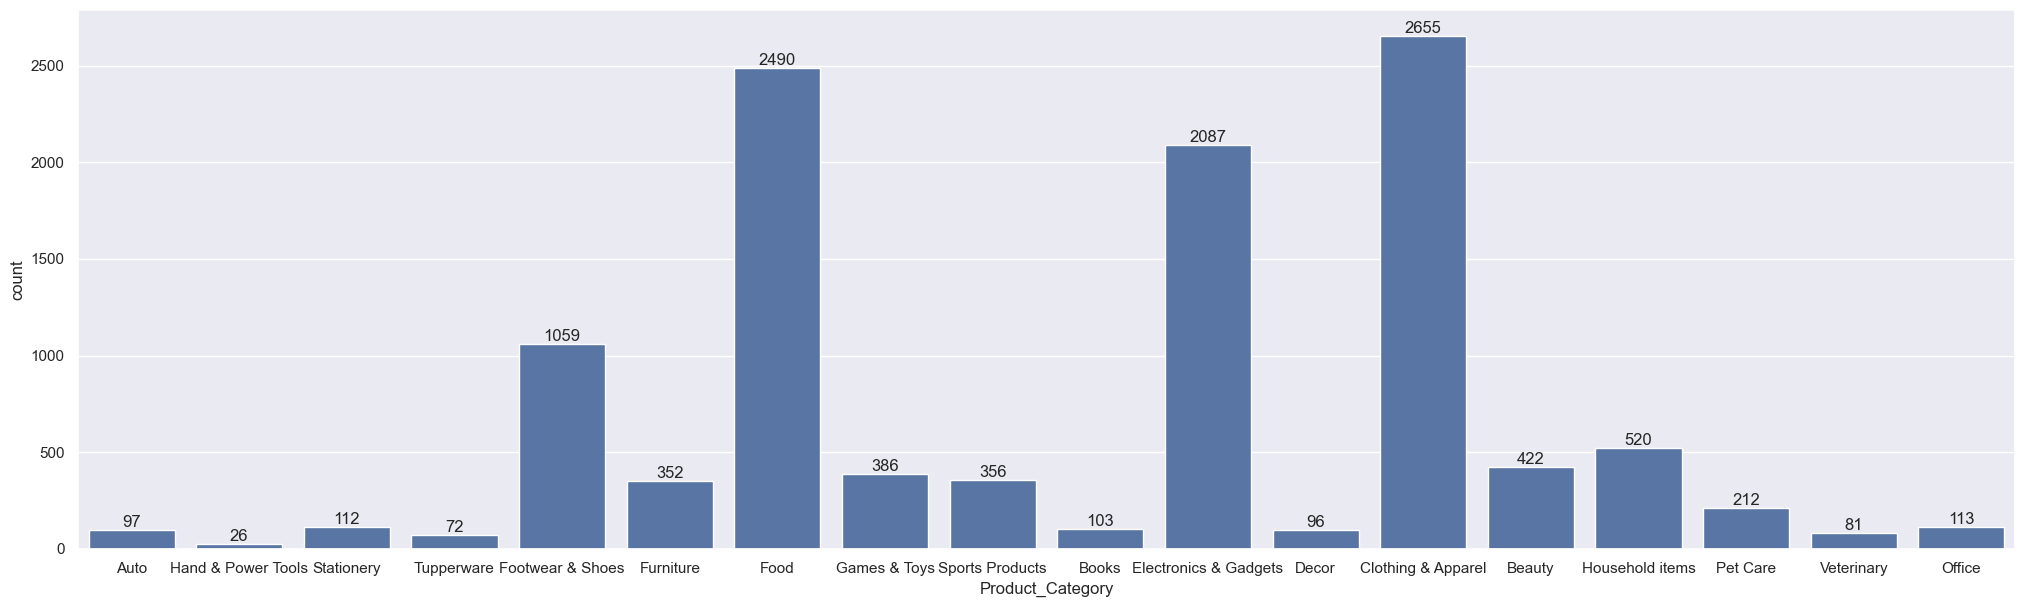

In [93]:
sns.set(rc={'figure.figsize' :(25,7)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

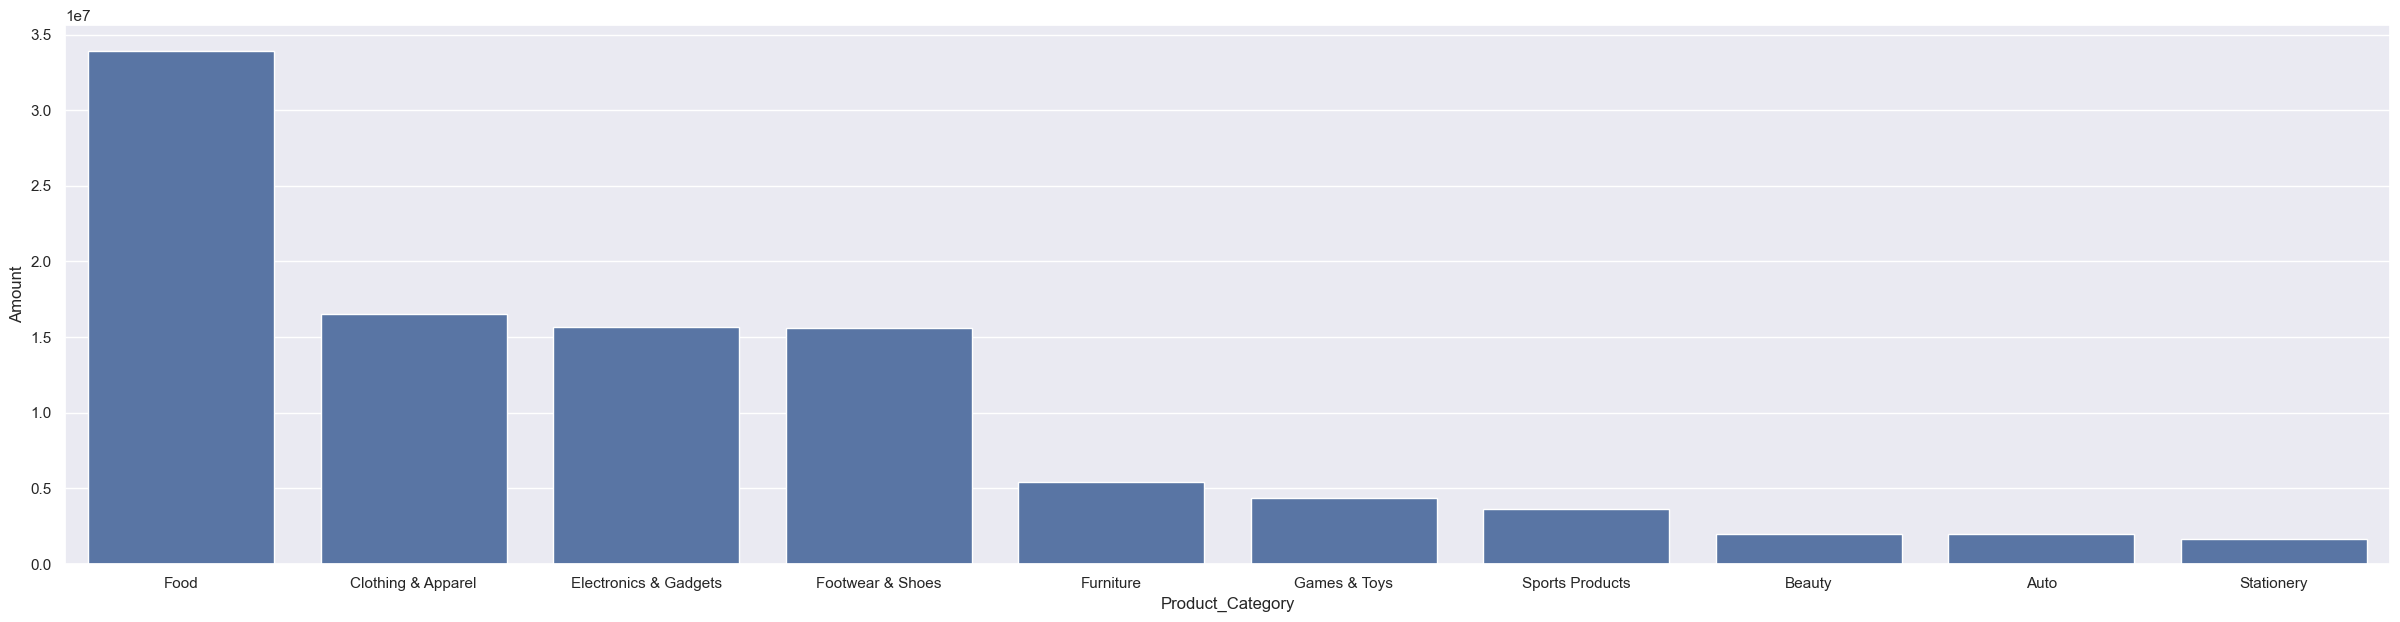

In [94]:
product_sales = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values (by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize' :(30,7)})
sns.barplot(data = product_sales, x = 'Product_Category', y = 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

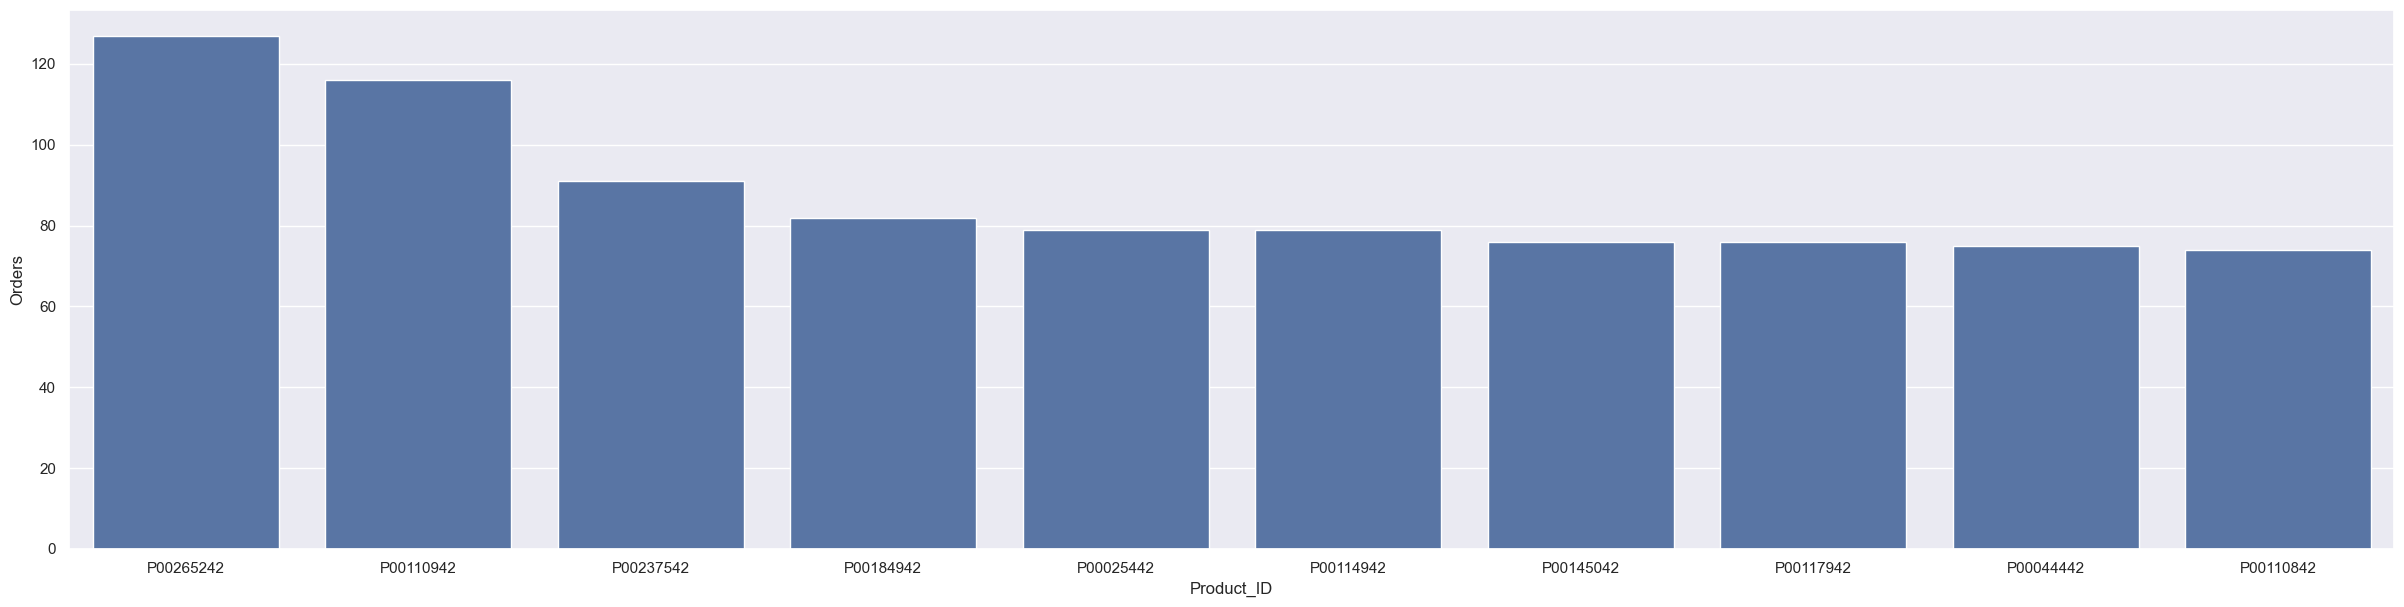

In [95]:
productid_orders = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values (by='Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize' :(30,7)})
sns.barplot(data = productid_orders, x = 'Product_ID', y = 'Orders')

<Axes: xlabel='Product_ID'>

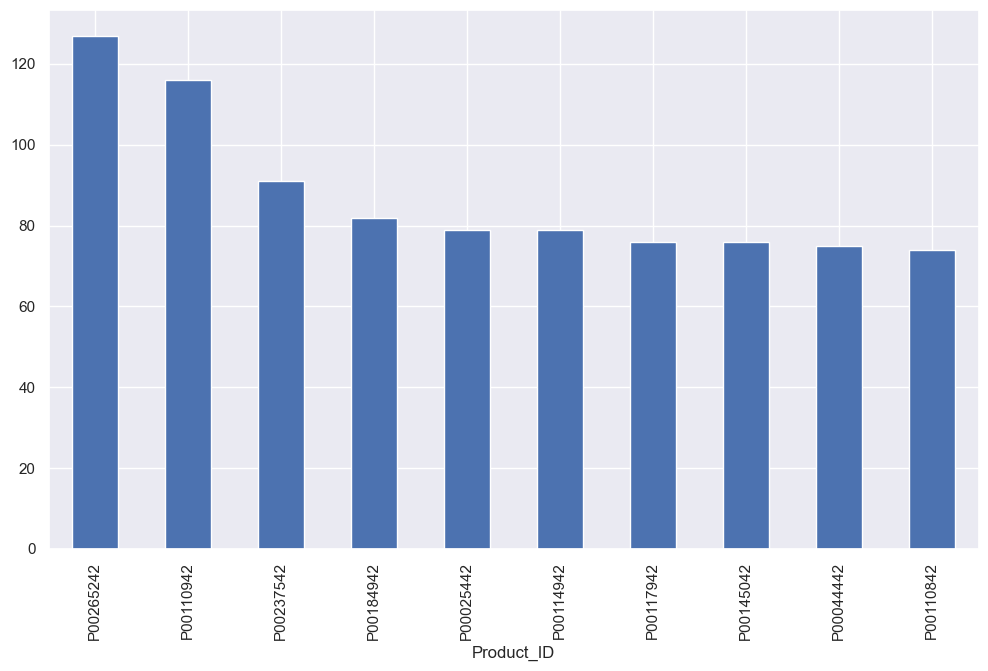

In [96]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

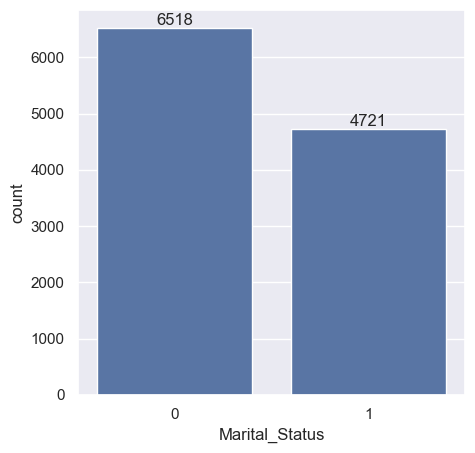

In [99]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set({'figure.figsize' :(5,2)})
for bars in ax.containers:
    ax.bar_label(bars)